In [1]:
%reset -f
%run pylib/tools dark
# plt.rcParams['figure.facecolor']='k'
from pylib.ipynb_docgen import *
show(f"""# DR4 Gevatar candidate selection""");show_date()

from pylib.lognlogs import setup_dr4
fgdf = setup_dr4()
set_theme(['dark']);

show("### Associations")
show(pd.Series(fgdf.groupby('association').size(),name='#'))

# DR4 Gevatar candidate selection

<h5 style="text-align:right; margin-right:15px"> 2025-01-16 10:23</h5>

* Load DR4 and add $G$

Loaded Fermi 4FGL gll_psc_v32.fit: 7195 entries
* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_uw1216_v13.fits`
  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$
 select energy= 1000 MeV


### Associations

association,blazar,msp,other,psr,unID
#,3934,179,511,141,2430


## Differential logN-logS: $S^2 \frac{dN}{dS}$ vs $\log{S}$
This corresponds to the  [Marcotulli et al. (MMA)](https://arxiv.org/pdf/2006.04703) Figure 6 upper right, except that $N$ is total 
 counts rather than counts / $\mathrm{deg}^{2}$, and I don't
 apply a detection efficiency factor.
Distributions for associated blazars (bll+fsrq+bcu), msp, psr and unID

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0xff87553c1490>
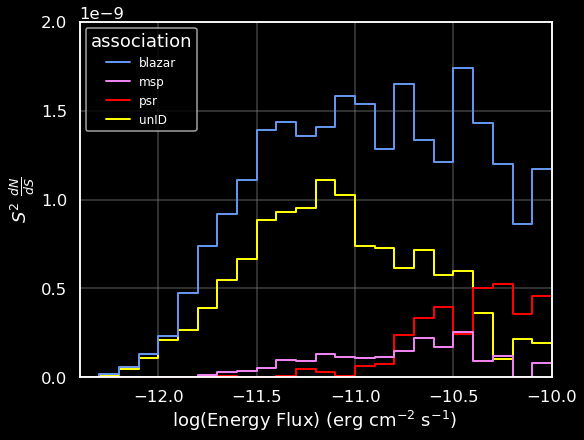

In [2]:
show(r"""## Differential logN-logS: $S^2 \frac{dN}{dS}$ vs $\log{S}$
This corresponds to the  [Marcotulli et al. (MMA)](https://arxiv.org/pdf/2006.04703) Figure 6 upper right, except that $N$ is total 
 counts rather than counts / $\mathrm{deg}^{2}$, and I don't
 apply a detection efficiency factor.
Distributions for associated blazars (bll+fsrq+bcu), msp, psr and unID""")
logs_label=r'log(Energy Flux) $(\mathrm{erg\ cm^{-2}\ s^{-1}})$ '
fig, ax =plt.subplots(figsize=(8,6))
sns.histplot(fgdf, x='logS', element='step', fill=False, lw=2,
             weights='S',
             hue ='association', 
             hue_order='blazar msp psr unID'.split(), 
             palette='cornflowerblue violet red yellow'.split(),
             bins= np.linspace(-12.4, -10, 25)
             # bins=30,
            );
ax.set(ylabel=r'$S^2\ \frac{dN}{dS}$', xlim=(-12.4,-10), xlabel=logs_label, 
       yticks=np.arange(0,2.1e-9,0.5e-9),)
sns.move_legend(ax, loc='upper left', fontsize=12);
show(fig)

### Figure from MMA

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0xff87553f4bf0>
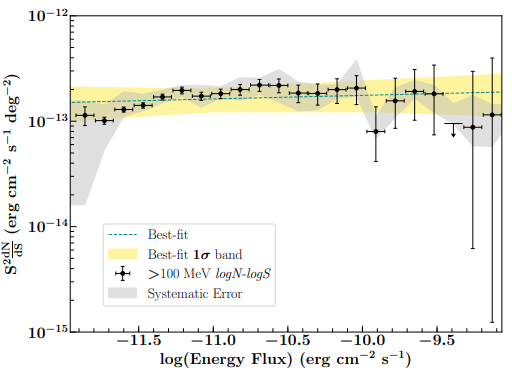

In [3]:
show('### Figure from MMA')
show('figures/logn-logs/Screenshot 2025-01-03 082024.png')

## Now with ranges in $G$

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0xff87553c2060>
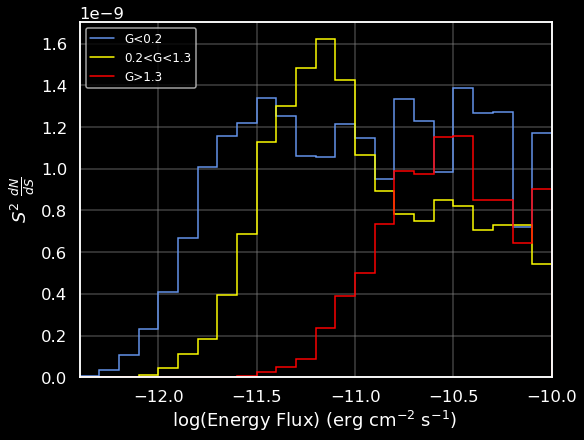

Notes:
* MMA chose to include sources with $|b|>20^\circ$, or $0.659\times 4\pi$,  $27143.61 \deg^2$
<br>Their value at -10.5: 5.4e-9 $\mathrm{erg\ cm^{-2}\ s^{-1}}$
* My solid angle fractions are $0.730, 0.260, 0.010\$

In [4]:
show(f"""## Now with ranges in $G$""")

def s2dnds_logs(df, ax=None, no_xlabel=False):

    bins = np.linspace(-12.4, -10, 25)
     
    fig, ax = plt.subplots(figsize=(8,6)) if ax is None else (ax.figure,ax)
    for q, color in zip(['G<0.2','0.2<G<1.3','G>1.3'],
                        'cornflowerblue yellow red'.split()):
        S = df.query(q).S
        dNdlogS, _ = np.histogram(np.log10(S), bins, weights=S) 
        ax.stairs(dNdlogS, bins, label=q, color=color)
    ax.legend(fontsize=12)
    ax.set( xlim=(-12.4, -10), ylim=(0,None),
          ylabel=r'$S^2\ \frac{dN}{dS}$', #yticks=np.arange(0,2.1e-9,0.5e-9),
           xlabel=logs_label if not no_xlabel else '')
    return fig
show(s2dnds_logs(fgdf))

show(r"""Notes:
* MMA chose to include sources with $|b|>20^\circ$, or $0.659\times 4\pi$,  $27143.61 \deg^2$
<br>Their value at -10.5: 5.4e-9 $\mathrm{erg\ cm^{-2}\ s^{-1}}$
* My solid angle fractions are $0.730, 0.260, 0.010\$
""")

### With selections: 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0xff8754ea7e00>
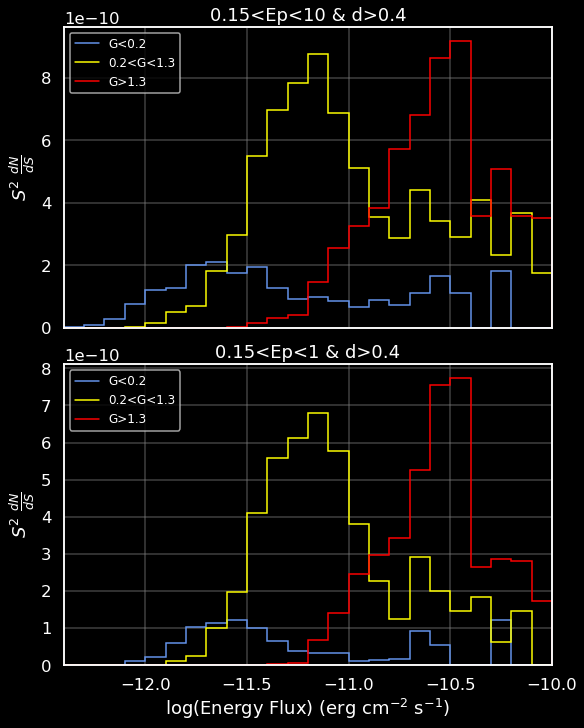

In [5]:
show(f"""### With selections: """)
fig, axx = plt.subplots(nrows=2, figsize=(8,10),sharex=True)
for emax, ax in zip((10,1), axx.flat):
    sel = f'0.15<Ep<{emax} & d>0.4'
    s2dnds_logs(fgdf.query(sel),ax=ax,  no_xlabel=(emax==10))
    ax.set_title(sel)

show(fig)

In [6]:
np.log10(0.4)

-0.3979400086720376

In [7]:
show('## Testing alternate classification')
def tclass(s):
    # s is a row, a Series object
    
    if s.association in 'psr msp'.split(): return 'pulsar'
    if s.association!="unID": return np.nan
    if ((s.G>0.6) & (s.G<1)
        & (s.logS<-11.1)
        & (s.d>0.2)
        & (s.Ep<1)
        # & (s.R95<8) & (s.dec>-90)
        ): return 'subset'
    return np.nan
        
fgdf['tclass'] = fgdf.apply(tclass, axis=1)
show(pd.Series(fgdf.groupby('tclass').size(), name='#'))

## Testing alternate classification

tclass,pulsar,subset
#,320,277


In [8]:
show(f"""## Define clsses""")
pulsars = fgdf.query('association=="psr" | association=="msp"')
# pulsars = fgdf.query('association=="msp"')
unid    = fgdf.query('association=="unID"')

show("""* Define cuts in $G$, $S$, $d$ and $E_p$ """)
qa = '0.6<G<1 & logS<-11.10 &  d>0.2 & 0.2< Ep<1'

show(f"""The query: "{(q:=qa+'& R95<8 & dec>-90')}" """)
subset=unid.query(q)
show(f'selects {len(subset)} unID sources and {len(pulsars.query(q))} pulsars' )


## Define clsses

* Define cuts in $G$, $S$, $d$ and $E_p$ 

The query: "0.6<G<1 & logS<-11.10 &  d>0.2 & 0.2< Ep<1& R95<8 & dec>-90" 

selects 123 unID sources and 3 pulsars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0xff8754f9a8a0>
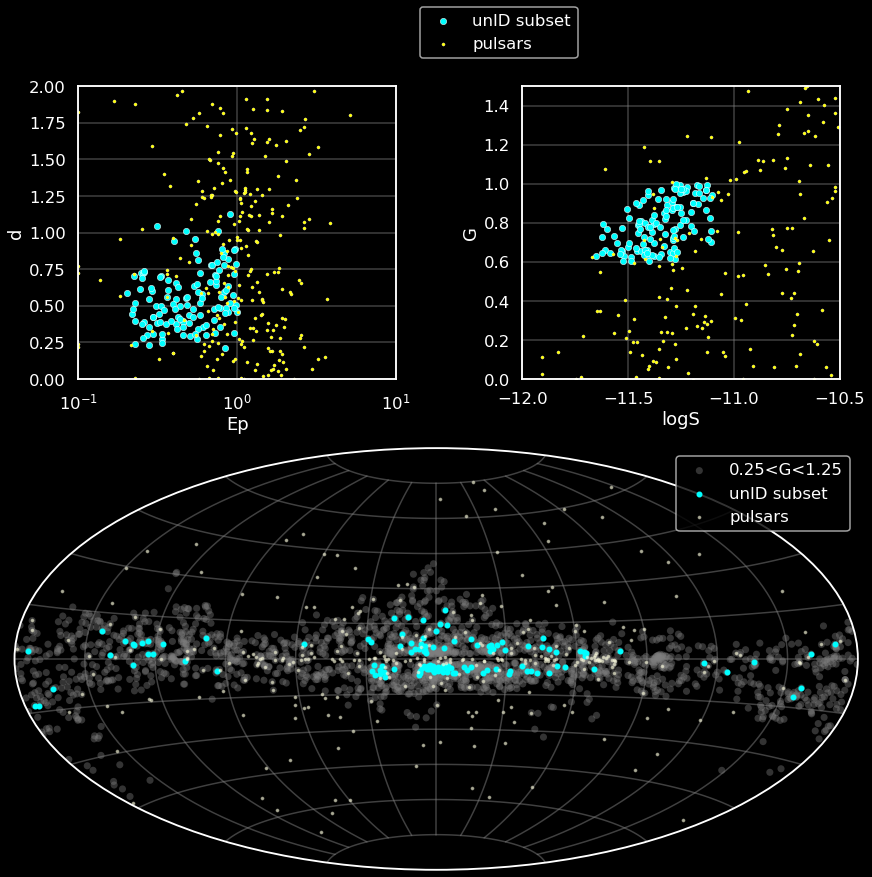

In [9]:
Gcut = '0.25<G<1.25'
def subset_scatter(subset, unid, pulsars): 
    from pylib.skymaps import AITfigure

    fig = plt.figure(figsize=(12,12))
    (sfig1,sfig2) = fig.subfigures(nrows=2)
    (ax1,ax2) = sfig1.subplots(ncols=2,  )
    ax1.set(ylim=(0,2))
    sns.scatterplot(subset, ax=ax1, x='Ep',   y='d', s=40, color='cyan')
    sns.scatterplot(pulsars, ax=ax1, x='Ep',   y='G', s=10, color='yellow')
    ax1.set(xlim=(.100,10.00), xscale='log')
    sns.scatterplot(subset, ax=ax2, x='logS', y='G', s=40, color='cyan', label='unID subset')
    sns.scatterplot(pulsars, ax=ax2, x='logS', y='G', s=10, color='yellow', label='pulsars')
    plt.legend(bbox_to_anchor=(0.2,1.3))
    
    ax2.set(xlim=(-12,-10.5), xticks=np.arange(-12,-10.49, 0.5),ylim=(0,1.5), )

    
    (AITfigure(fig=sfig2)
     .scatter(fgdf.query(Gcut),s=50, color='0.5', label=Gcut, alpha=0.4,
              edgecolor='none')
     .scatter(subset, s=20, color='cyan', label='unID subset')
     .scatter(pulsars, s=5, color='lightyellow', label='pulsars',alpha=0.5)
     .legend()
    );
    return fig
show_fig(subset_scatter, subset, unid, pulsars)

---
# Try with 16-year uw sources

Loaded 12036 sources from sources_uw1616.csv
* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_uw1216_v13.fits`
  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$
 select energy= 1000 MeV


<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0xff87542988f0>
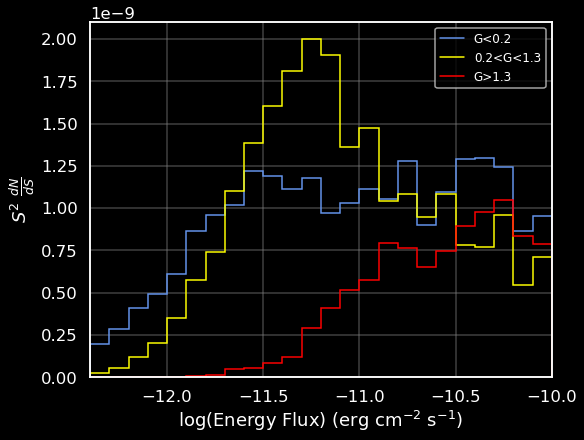

In [21]:
show(f"""---
# Try with 16-year uw sources""")
from pylib.pointlike import *
self=PointlikeModel()

df = self.df.copy()
glon = df.glon.values
glon[glon>180]-=360
df['inner'] = np.abs(glon)<90
df['S'] = df.eflux100
df['logS'] = np.log10(df.S)
df['R95']  = np.sqrt(df.a*df.b)*df.systematic*2.45*60

show(s2dnds_logs(df))



<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0xff874b4e2360>
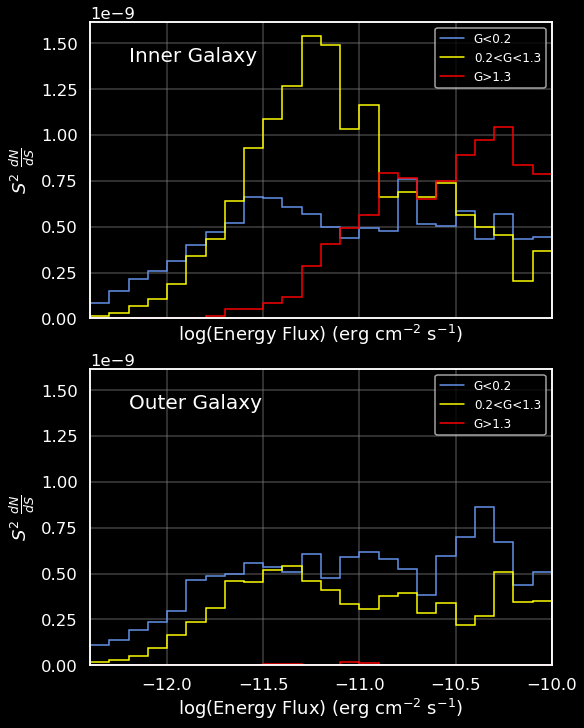

In [50]:
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(8,10), sharex=True, sharey=True)
s2dnds_logs(df[df.inner], ax=ax1); 
ax1.text(-12.2, 1.4e-9, 'Inner Galaxy', fontsize=20)
s2dnds_logs(df[~df.inner], ax=ax2)
ax2.text(-12.2, 1.4e-9, 'Outer Galaxy', fontsize=20)
show(fig)

### With selections: 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0xff8748ff15b0>
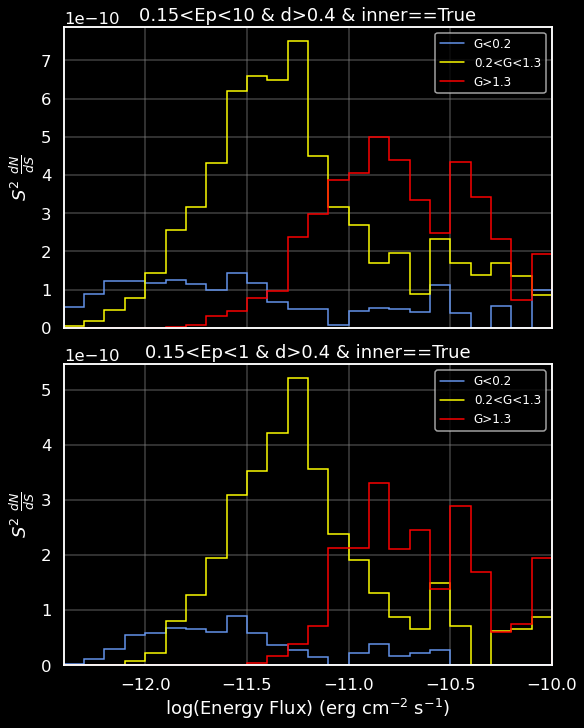

In [49]:
show(f"""### With selections: """)
fig, axx = plt.subplots(nrows=2, figsize=(8,10),sharex=True)
for emax, ax in zip((10,1), axx.flat):
    sel = f'0.15<Ep<{emax} & d>0.4 & inner==True'
    s2dnds_logs(ax=ax, df=df.query(sel).copy(), no_xlabel=(emax==10))
    ax.set_title(sel)

show(fig)

The query: "0.6<G<1 & logS<-11.10 &  d>0.4 & 0.2< Ep<1& R95<8 & dec>-90" 

selects 112 unID sources and 4 pulsars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0xff8755015a00>
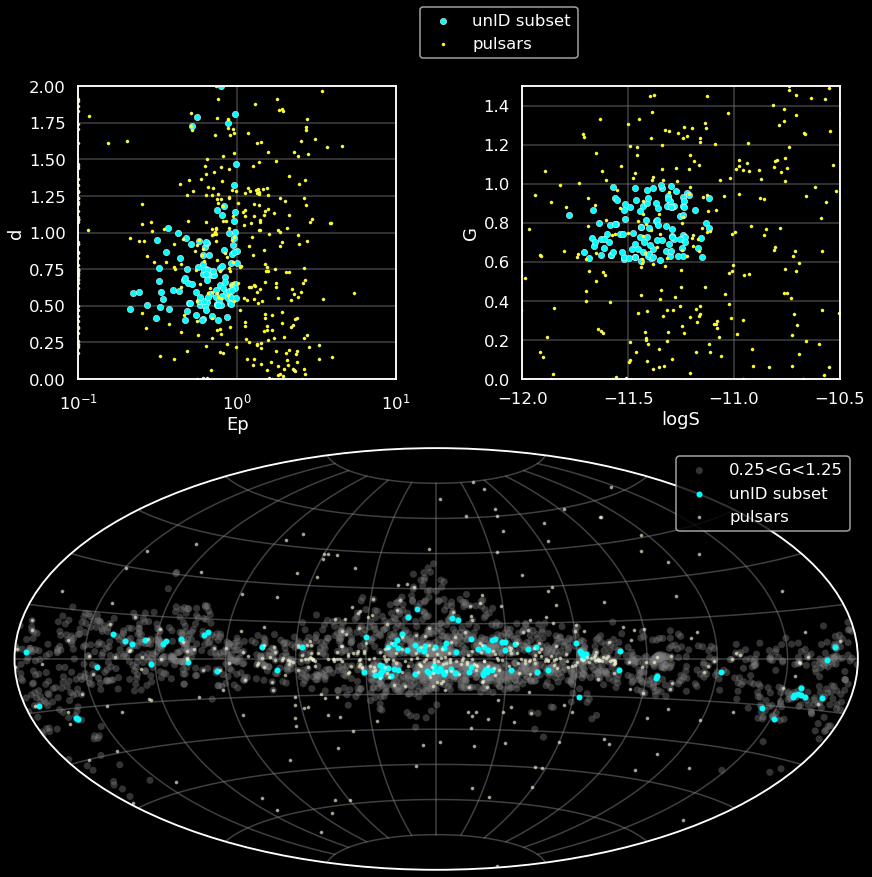

In [12]:
pulsars16 = df.query('acat=="pulsar_lat" | acat=="pulsar_big"')
# pulsars = fgdf.query('association=="msp"')
qa = '0.6<G<1 & logS<-11.10 &  d>0.4 & 0.2< Ep<1'
unid16 = df.query('aprob==0')
show(f"""The query: "{(q:=qa+'& R95<8 & dec>-90')}" """)
subset16=unid16.query(q)
show(f'selects {len(subset16)} unID sources and {len(pulsars16.query(q))} pulsars' )

show_fig(subset_scatter, subset16, unid16, pulsars16)


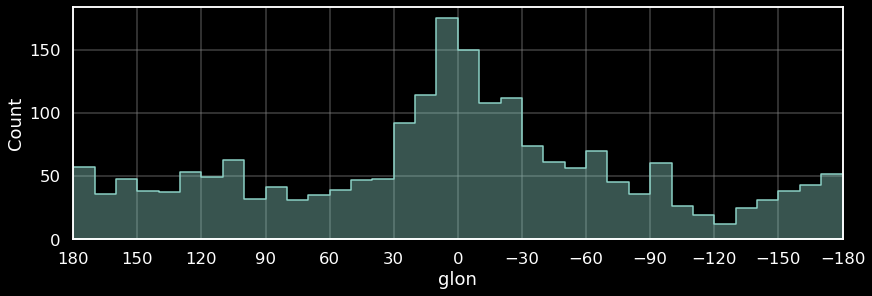

In [13]:
fig = plt.figure(figsize=(12,4))
glon = fgdf.query(Gcut).glon.values
glon[glon>180]-=360
sns.histplot(glon, label=Gcut, alpha=0.4, element='step', bins=np.arange(-180,181,10));
plt.gca().set(xlim=(180,-180), xlabel='glon', xticks=np.arange(180, -181,-30));

In [14]:
subset16['ra dec ts R95 d Ep G logS'.split()].to_csv('files/gevatar_list.csv',float_format='%.3f' )

In [15]:
show(pd.Series(df.groupby('acat').size(), name='#'))

acat,agn,bllac,bzcat,cgrabs,crates,dwarfs,galaxies,globular,hmxb,ibis,lbv,lmxb,ocl,ostar,pulsar_big,pulsar_lat,pwn,qso,seyfert_rl,snr,snr_ext,starbursts,tev
#,66,282,1245,471,754,23,2,26,4,12,2,10,48,18,153,288,8,247,3,14,190,6,6


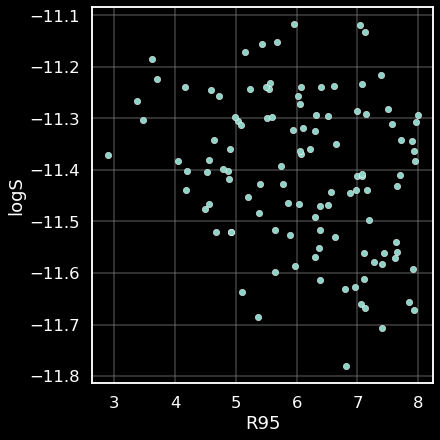

In [16]:
fig= plt.figure(figsize=(6,6))
sns.scatterplot(subset16, x='R95', y='logS', s=40);

# Examine Kent's scheme
Involves using $b$ and $S$ -- so look at the correlation 

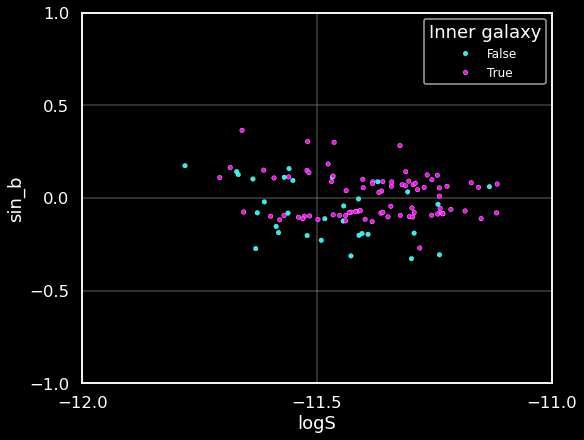

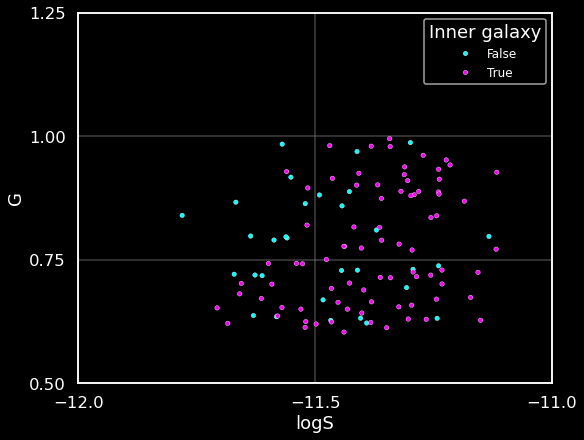

In [17]:
show(f"""# Examine Kent's scheme
Involves using $b$ and $S$ -- so look at the correlation 
""")
xdf = subset16.copy()
glon = xdf.glon.values
glon[glon>180]-=360
xdf['sin_b'] = np.sin(np.radians(xdf.glat))
xdf['inner'] = np.abs(glon)<90

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(xdf, ax=ax, hue='inner', y='sin_b', x='logS', s=20,
               palette='cyan magenta'.split());
ax.legend(fontsize=12,title='Inner galaxy');
ax.set(ylim=(-1,1), yticks=np.arange(-1,1.01,0.5), 
       xticks=np.arange(-12,-10.9,.5));

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(xdf, ax=ax, hue='inner', y='G', x='logS', s=20,
               palette='cyan magenta'.split());
ax.legend(fontsize=12,title='Inner galaxy');
ax.set(yticks=np.arange(0.5,1.26,0.25), 
       xticks=np.arange(-12,-10.9,.5));

In [18]:
show(f"""A complication: inner and outer S distributions not the sams.""")

A complication: inner and outer S distributions not the sams.